In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,StandardScaler,FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report


In [2]:
df = pd.read_csv('/kaggle/input/healthcare-appointment-dataset/healthcare_noshows.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [4]:
df.shape

(106987, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [7]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
df['S_year'] = df['ScheduledDay'].dt.year
df['S_month'] = df['ScheduledDay'].dt.month
df['S_day_date'] = df['ScheduledDay'].dt.day
df['S_day_of_week'] = df['ScheduledDay'].dt.day_name()

df['A_year'] = df['AppointmentDay'].dt.year
df['A_month'] = df['AppointmentDay'].dt.month
df['A_day_date'] = df['AppointmentDay'].dt.day
df['A_day_of_week'] = df['AppointmentDay'].dt.day_name()

In [9]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Showed_up,Date.diff,S_year,S_month,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,...,True,0,2016,4,29,Friday,2016,4,29,Friday
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,...,True,2,2016,4,27,Wednesday,2016,4,29,Friday
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,...,False,2,2016,4,27,Wednesday,2016,4,29,Friday
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,...,False,2,2016,4,27,Wednesday,2016,4,29,Friday
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,...,True,2,2016,4,27,Wednesday,2016,4,29,Friday


In [10]:
df['Year_difference'] = df['A_year']- df['S_year']
df['month_difference'] = df['A_month']- df['S_month']
df['day_difference'] = df['A_day_date']- df['S_day_date']

df['Year_difference']=df['Year_difference'].abs()
df['month_difference']=df['month_difference'].abs()
df['day_difference']=df['day_difference'].abs()

In [11]:
df['A_month'] = df['AppointmentDay'].dt.month_name()
df['S_month'] = df['ScheduledDay'].dt.month_name()

In [12]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,S_month,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week,Year_difference,month_difference,day_difference
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2


In [13]:
df['Neighbourhood'].value_counts().head(50)

Neighbourhood
JARDIM CAMBURI         7586
MARIA ORTIZ            5563
RESISTÊNCIA            4235
JARDIM DA PENHA        3851
ITARARÉ                3412
CENTRO                 3282
SANTA MARTHA           3041
TABUAZEIRO             3019
JESUS DE NAZARETH      2719
BONFIM                 2700
SANTO ANTÔNIO          2673
CARATOÍRA              2489
SANTO ANDRÉ            2458
JABOUR                 2396
SÃO PEDRO              2346
ILHA DO PRÍNCIPE       2222
ANDORINHAS             2195
DA PENHA               2155
NOVA PALESTINA         2147
ROMÃO                  2126
GURIGICA               1905
SÃO JOSÉ               1868
MARUÍPE                1865
BELA VISTA             1834
ILHA DE SANTA MARIA    1823
FORTE SÃO JOÃO         1809
SÃO CRISTÓVÃO          1785
REDENÇÃO               1491
JOANA D´ARC            1358
CRUZAMENTO             1357
SÃO BENEDITO           1351
CONSOLAÇÃO             1327
PRAIA DO SUÁ           1259
SANTA TEREZA           1259
SANTOS DUMONT          1249
GRANDE

In [14]:
drop_columns = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Date.diff']
df = df.drop(drop_columns,axis=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

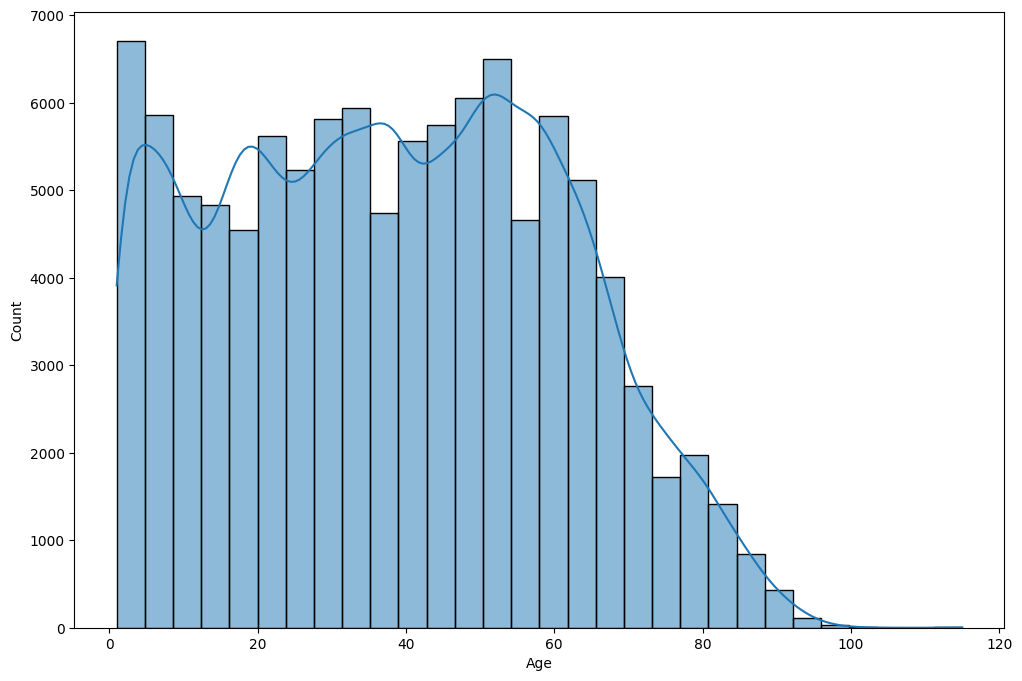

In [15]:
plt.figure(figsize = (12,8))
sns.histplot(df['Age'],bins=30,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year_difference', ylabel='Count'>

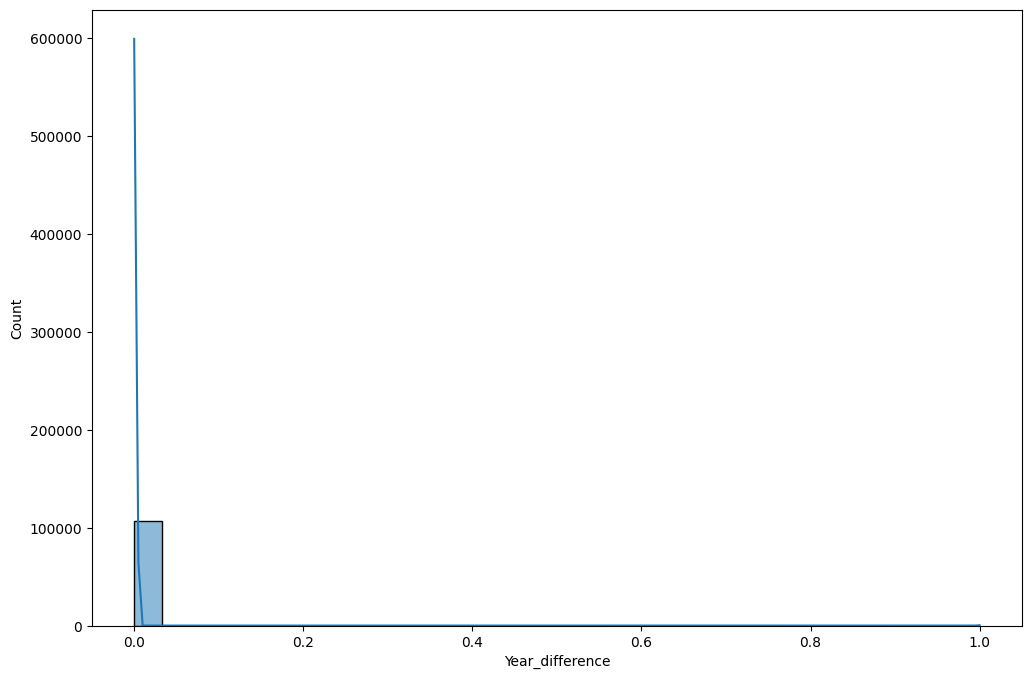

In [16]:
plt.figure(figsize = (12,8))
sns.histplot(df['Year_difference'],bins=30,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month_difference', ylabel='Count'>

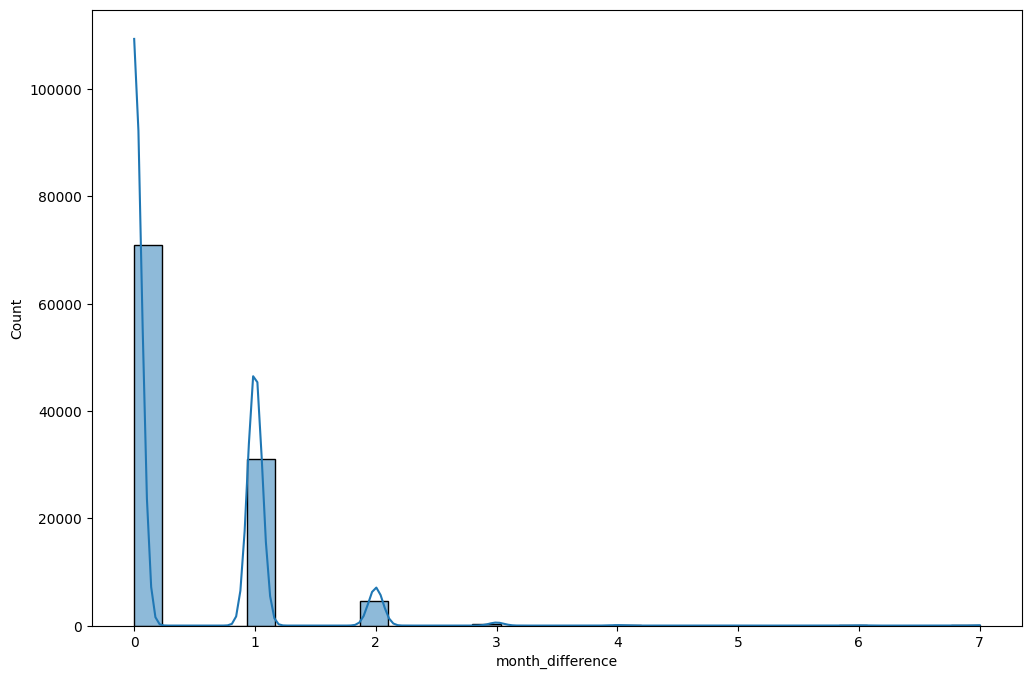

In [17]:
plt.figure(figsize = (12,8))
sns.histplot(df['month_difference'],bins=30,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_difference', ylabel='Count'>

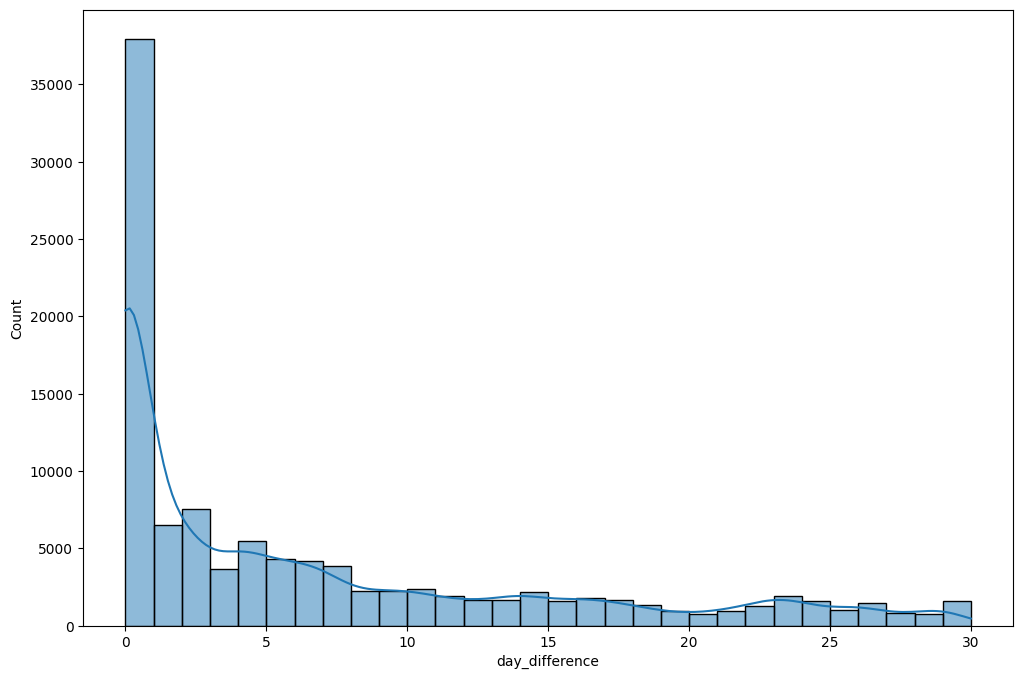

In [18]:
plt.figure(figsize = (12,8))
sns.histplot(df['day_difference'],bins=30,kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='A_month', ylabel='count'>

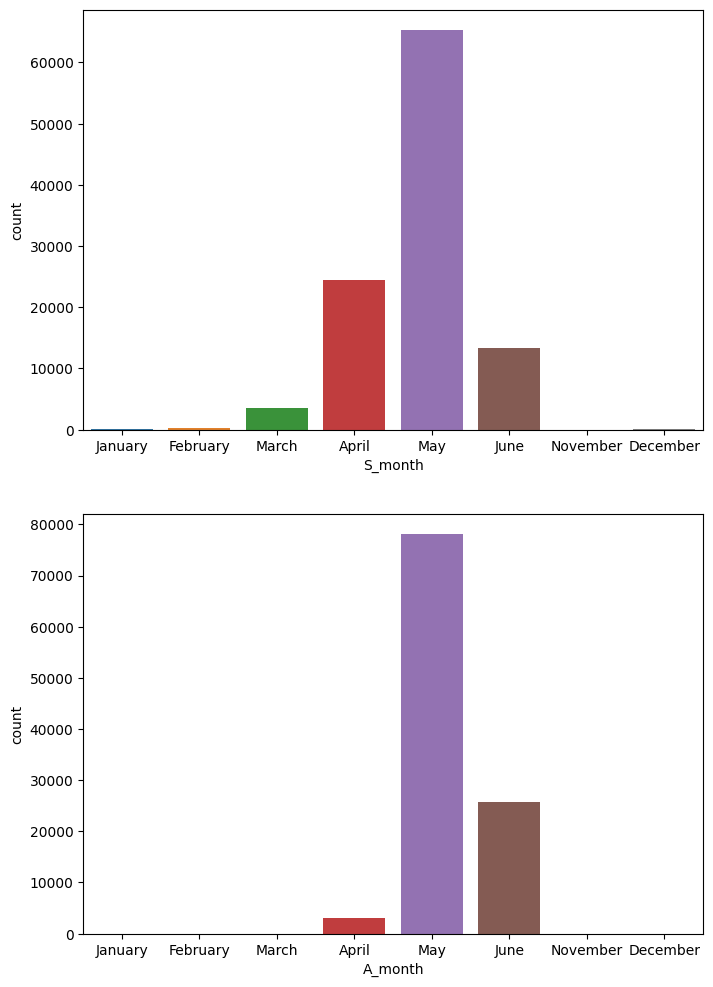

In [19]:
month_order = ['January','February','March','April','May','June','November','December']
df['S_month'] = pd.Categorical(df['S_month'],categories=month_order,ordered=True)
df['A_month'] = pd.Categorical(df['A_month'],categories=month_order,ordered=True)
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.countplot(x='S_month',data=df)

plt.subplot(2,1,2)
sns.countplot(x='A_month',data=df)

<Axes: xlabel='A_day_of_week', ylabel='count'>

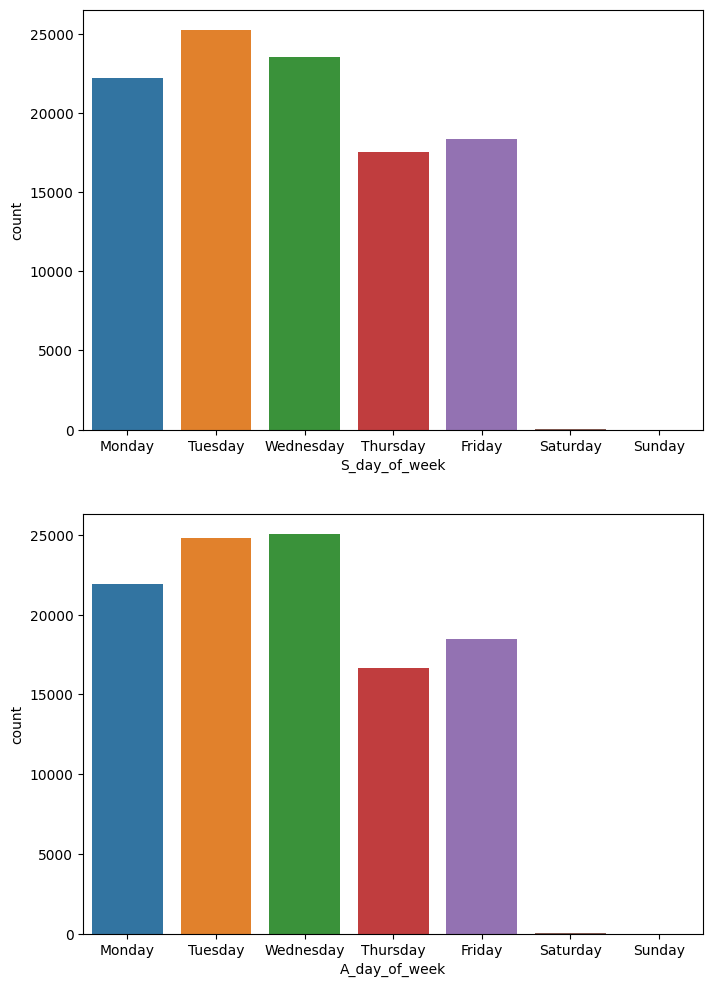

In [20]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['S_day_of_week'] = pd.Categorical(df['S_day_of_week'],categories=day_order,ordered=True)
df['A_day_of_week'] = pd.Categorical(df['A_day_of_week'],categories=day_order,ordered=True)
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.countplot(x='S_day_of_week',data=df)

plt.subplot(2,1,2)
sns.countplot(x='A_day_of_week',data=df)

<Axes: ylabel='Neighbourhood'>

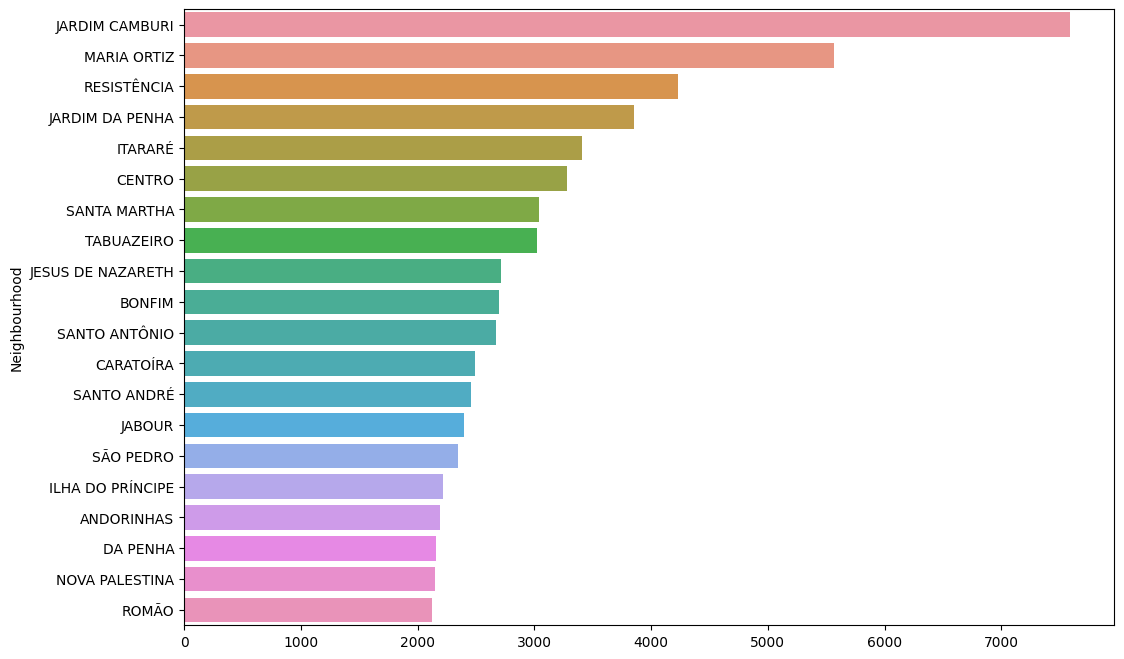

In [21]:
neigbourhood = df['Neighbourhood'].value_counts().head(20)
plt.figure(figsize = (12,8))
sns.barplot(x=neigbourhood.values,y=neigbourhood.index)

In [22]:
def replace_values(column,df):
    value_counts = df[column].value_counts()
    value_to_replace = value_counts[value_counts < 100].index
    df[column] = df[column].replace(value_to_replace,'Other')

<Axes: xlabel='Showed_up', ylabel='count'>

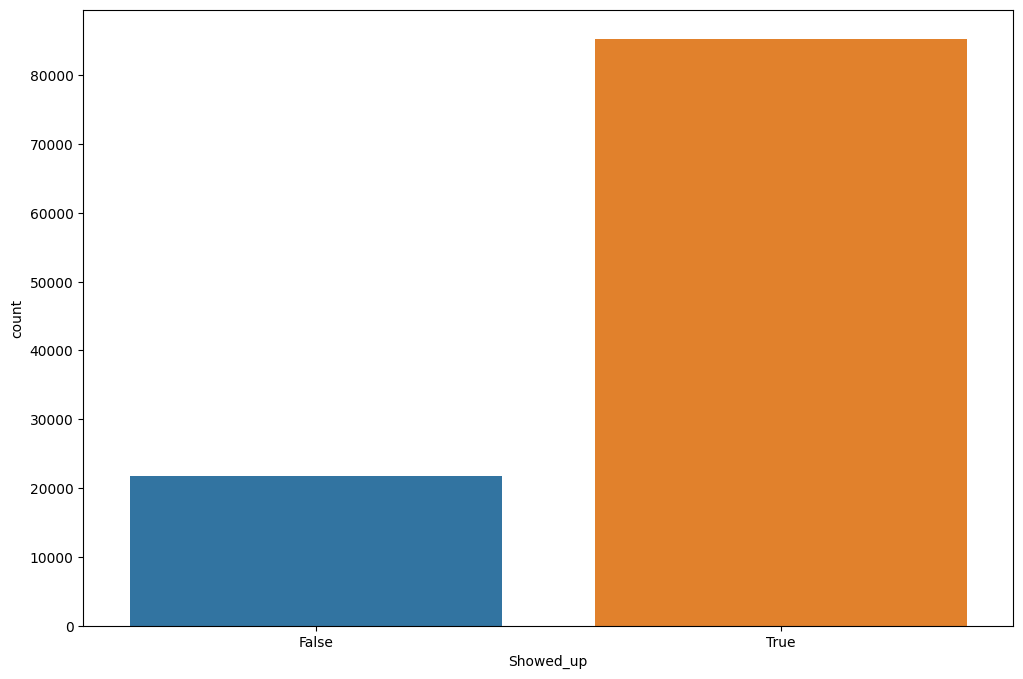

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='Showed_up',data=df)

Text(0, 0.5, 'Count')

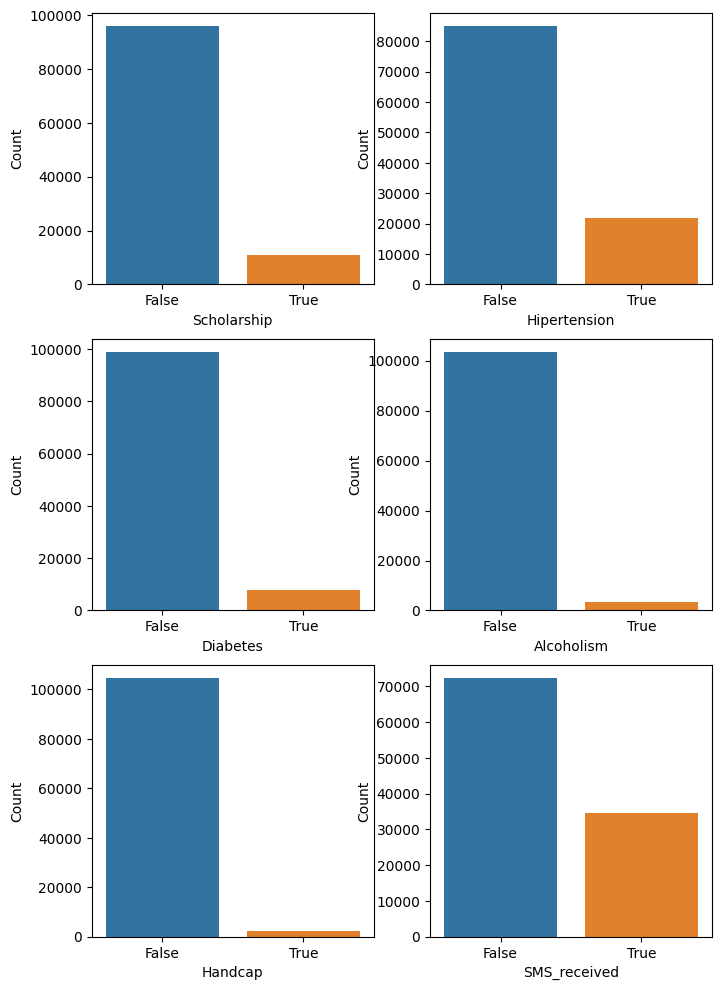

In [24]:
plt.figure(figsize=(8,12))

plt.subplot(3,2,1)
sns.countplot(x='Scholarship',data=df)
plt.xlabel('Scholarship')
plt.ylabel('Count')

plt.subplot(3,2,2)
sns.countplot(x='Hipertension',data=df)
plt.xlabel('Hipertension')
plt.ylabel('Count')

plt.subplot(3,2,3)
sns.countplot(x='Diabetes',data=df)
plt.xlabel('Diabetes')
plt.ylabel('Count')

plt.subplot(3,2,4)
sns.countplot(x='Alcoholism',data=df)
plt.xlabel('Alcoholism')
plt.ylabel('Count')

plt.subplot(3,2,5)
sns.countplot(x='Handcap',data=df)
plt.xlabel('Handcap')
plt.ylabel('Count')

plt.subplot(3,2,6)
sns.countplot(x='SMS_received',data=df)
plt.xlabel('SMS_received')
plt.ylabel('Count')

<Axes: xlabel='Gender', ylabel='count'>

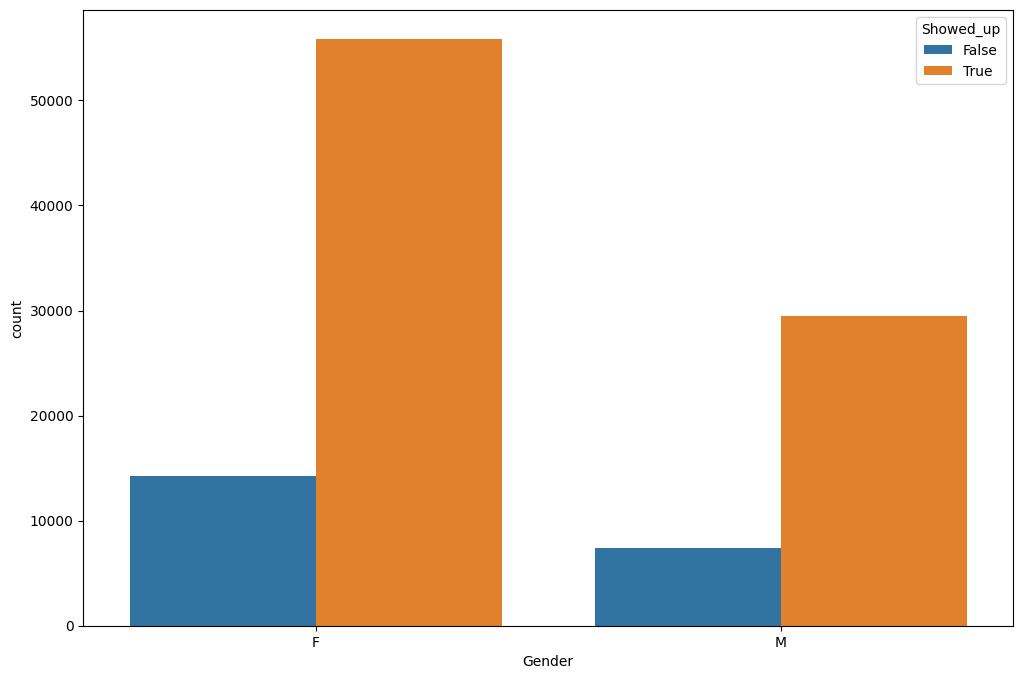

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'Gender',hue='Showed_up',data=df)

Text(0, 0.5, 'Count')

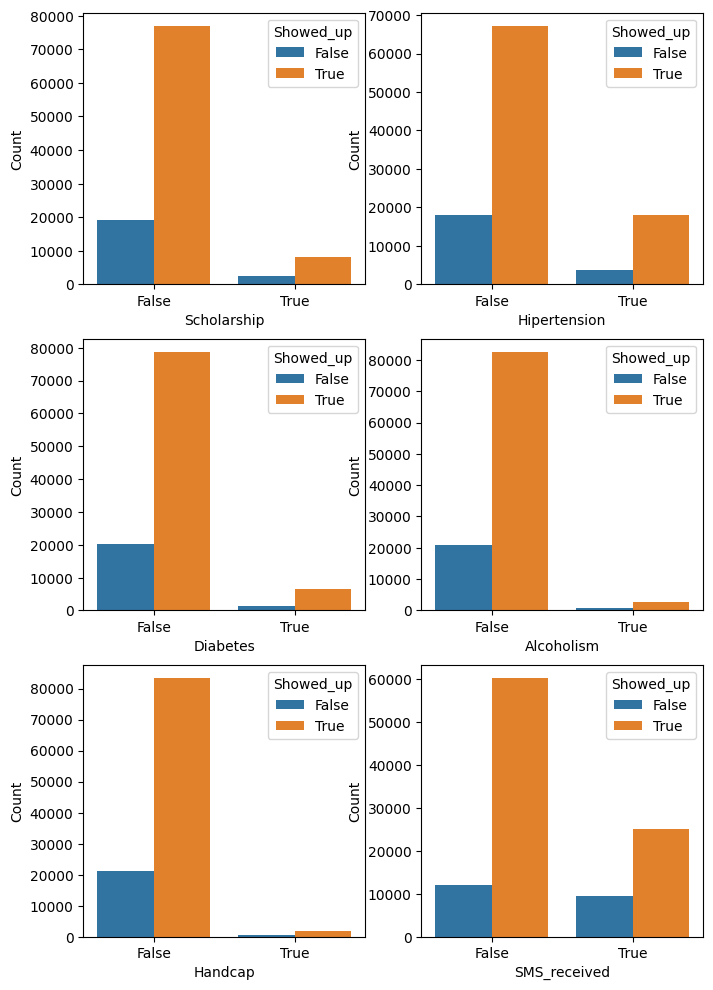

In [26]:
plt.figure(figsize=(8,12))

plt.subplot(3,2,1)
sns.countplot(x='Scholarship',data=df,hue='Showed_up')
plt.xlabel('Scholarship')
plt.ylabel('Count')

plt.subplot(3,2,2)
sns.countplot(x='Hipertension',data=df,hue='Showed_up')
plt.xlabel('Hipertension')
plt.ylabel('Count')

plt.subplot(3,2,3)
sns.countplot(x='Diabetes',data=df,hue='Showed_up')
plt.xlabel('Diabetes')
plt.ylabel('Count')

plt.subplot(3,2,4)
sns.countplot(x='Alcoholism',data=df,hue='Showed_up')
plt.xlabel('Alcoholism')
plt.ylabel('Count')

plt.subplot(3,2,5)
sns.countplot(x='Handcap',data=df,hue='Showed_up')
plt.xlabel('Handcap')
plt.ylabel('Count')

plt.subplot(3,2,6)
sns.countplot(x='SMS_received',data=df,hue='Showed_up')
plt.xlabel('SMS_received')
plt.ylabel('Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Count'>

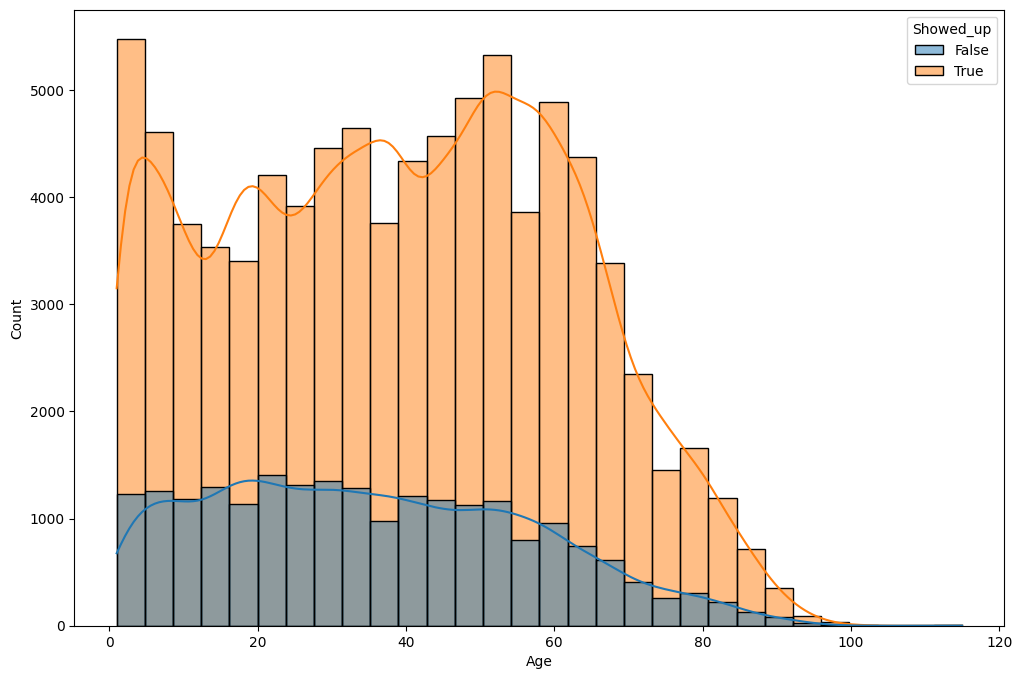

In [27]:
plt.figure(figsize = (12,8))
sns.histplot(data=df,x='Age',bins=30,kde=True,hue='Showed_up')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Axes: xlabel='A_day_date', ylabel='Count'>

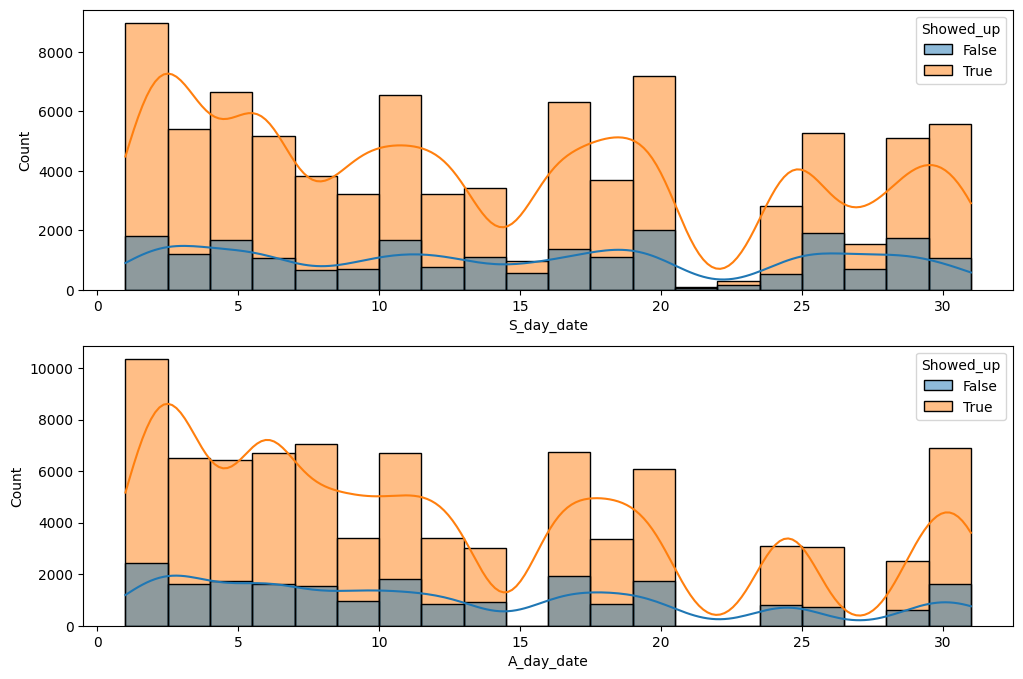

In [28]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
sns.histplot(data=df,x='S_day_date',bins=20,kde=True,hue='Showed_up')

plt.subplot(2,1,2)
sns.histplot(data=df,x='A_day_date',bins=20,kde=True,hue='Showed_up')

<Axes: xlabel='Showed_up', ylabel='Age'>

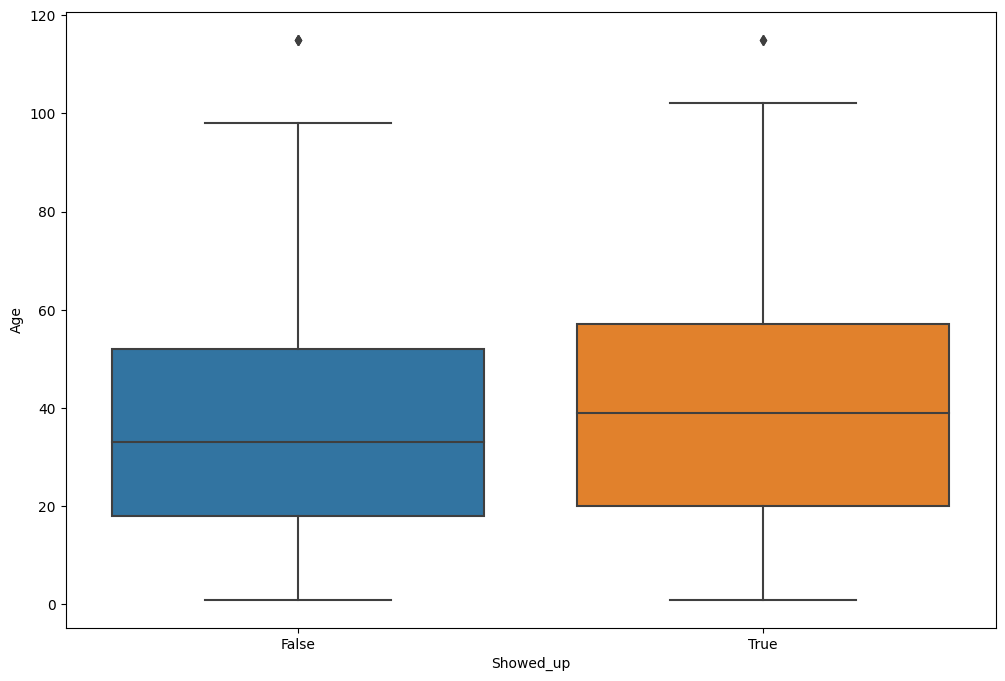

In [29]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df,y='Age',x='Showed_up')

<Axes: xlabel='Showed_up', ylabel='A_day_date'>

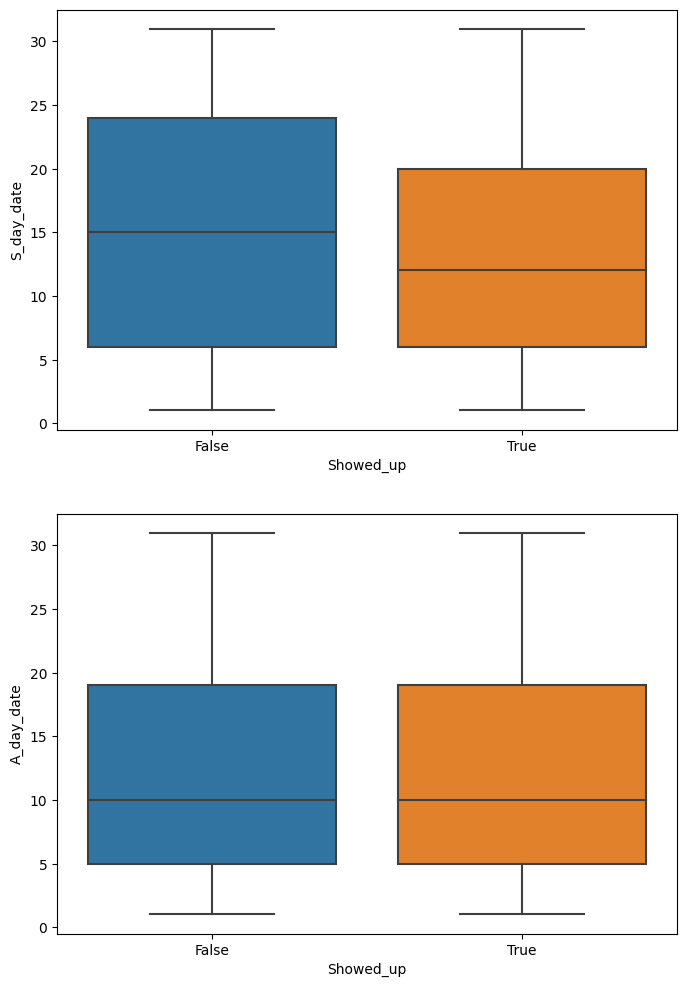

In [30]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.boxplot(data=df,y='S_day_date',x='Showed_up')

plt.subplot(2,1,2)
sns.boxplot(data=df,y='A_day_date',x='Showed_up')

In [31]:
df['z_score'] = stats.zscore(df['Age'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
outliers

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,...,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week,Year_difference,month_difference,day_difference,z_score
61803,F,115,ANDORINHAS,False,False,False,False,True,False,False,...,16,Monday,2016,May,19,Thursday,0,0,3,3.413315
61806,F,115,ANDORINHAS,False,False,False,False,True,False,False,...,16,Monday,2016,May,19,Thursday,0,0,3,3.413315
65876,F,115,ANDORINHAS,False,False,False,False,True,False,False,...,8,Friday,2016,May,16,Monday,0,1,8,3.413315
73825,F,115,ANDORINHAS,False,False,False,False,True,False,True,...,30,Monday,2016,May,30,Monday,0,0,0,3.413315
94560,F,115,SÃO JOSÉ,False,True,False,False,False,True,True,...,19,Thursday,2016,June,3,Friday,0,1,16,3.413315


In [32]:
df = df[(df['z_score'] <= 3) & (df['z_score'] >= -3)]

df.drop('z_score', axis=1, inplace=True)

In [33]:
df['Age_sqrt'] = np.sqrt(df['Age'])
df['Age_log'] = np.log(df['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Axes: xlabel='Age_log', ylabel='Count'>

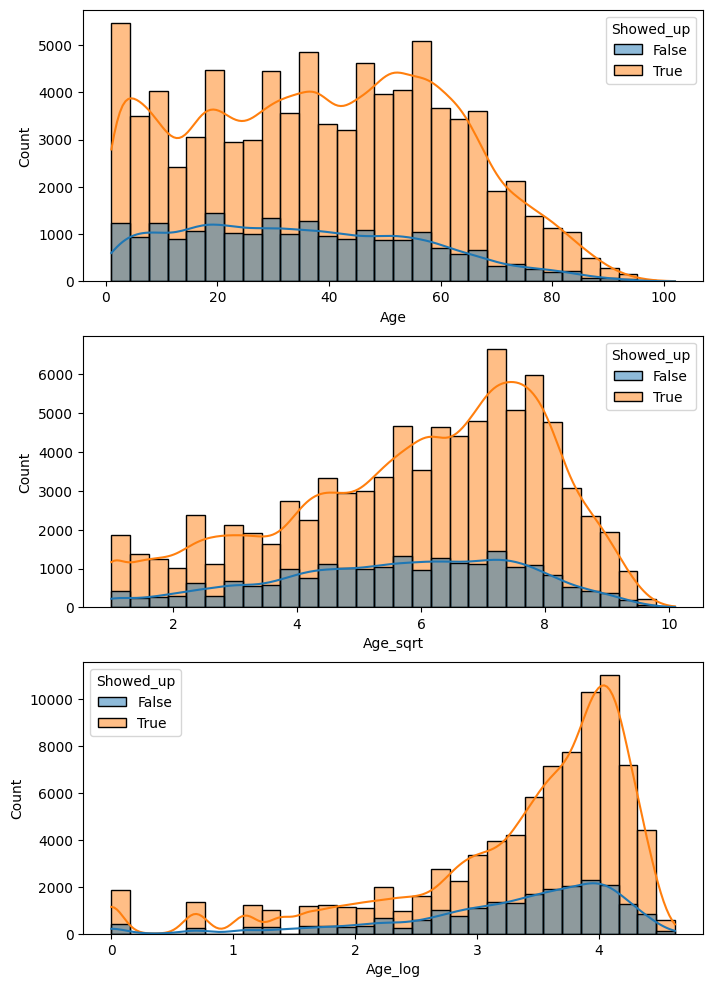

In [34]:
plt.figure(figsize = (8,12))

plt.subplot(3,1,1)
sns.histplot(data=df,x='Age',bins=30,kde=True,hue='Showed_up')

plt.subplot(3,1,2)
sns.histplot(data=df,x='Age_sqrt',bins=30,kde=True,hue='Showed_up')

plt.subplot(3,1,3)
sns.histplot(data=df,x='Age_log',bins=30,kde=True,hue='Showed_up')

In [35]:
df.drop(['Age_sqrt','Age_log'],axis=1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,...,S_month,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week,Year_difference,month_difference,day_difference
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,56,MARIA ORTIZ,False,False,False,False,False,True,True,...,May,3,Tuesday,2016,June,7,Tuesday,0,1,4
106983,F,51,MARIA ORTIZ,False,False,False,False,False,True,True,...,May,3,Tuesday,2016,June,7,Tuesday,0,1,4
106984,F,21,MARIA ORTIZ,False,False,False,False,False,True,True,...,April,27,Wednesday,2016,June,7,Tuesday,0,2,20
106985,F,38,MARIA ORTIZ,False,False,False,False,False,True,True,...,April,27,Wednesday,2016,June,7,Tuesday,0,2,20


In [36]:
neighbourhood_counts = df['Neighbourhood'].value_counts()
neighbourhoods_to_replace = neighbourhood_counts[neighbourhood_counts < 1000].index
df['Neighbourhood'] = df['Neighbourhood'].replace(neighbourhoods_to_replace, 'OTHER')

In [37]:
df['Neighbourhood'].value_counts().head(50)

Neighbourhood
OTHER                  17721
JARDIM CAMBURI          7586
MARIA ORTIZ             5563
RESISTÊNCIA             4235
JARDIM DA PENHA         3851
ITARARÉ                 3412
CENTRO                  3282
SANTA MARTHA            3041
TABUAZEIRO              3019
JESUS DE NAZARETH       2719
BONFIM                  2700
SANTO ANTÔNIO           2673
CARATOÍRA               2489
SANTO ANDRÉ             2458
JABOUR                  2396
SÃO PEDRO               2346
ILHA DO PRÍNCIPE        2222
ANDORINHAS              2191
DA PENHA                2155
NOVA PALESTINA          2147
ROMÃO                   2126
GURIGICA                1905
SÃO JOSÉ                1867
MARUÍPE                 1865
BELA VISTA              1834
ILHA DE SANTA MARIA     1823
FORTE SÃO JOÃO          1809
SÃO CRISTÓVÃO           1785
REDENÇÃO                1491
JOANA D´ARC             1358
CRUZAMENTO              1357
SÃO BENEDITO            1351
CONSOLAÇÃO              1327
PRAIA DO SUÁ            1259


In [38]:
df = df.apply(lambda col: col.astype('int64') if col.dtype == 'int32' else col)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106982 entries, 0 to 106986
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Gender            106982 non-null  object  
 1   Age               106982 non-null  int64   
 2   Neighbourhood     106982 non-null  object  
 3   Scholarship       106982 non-null  bool    
 4   Hipertension      106982 non-null  bool    
 5   Diabetes          106982 non-null  bool    
 6   Alcoholism        106982 non-null  bool    
 7   Handcap           106982 non-null  bool    
 8   SMS_received      106982 non-null  bool    
 9   Showed_up         106982 non-null  bool    
 10  S_year            106982 non-null  int64   
 11  S_month           106982 non-null  category
 12  S_day_date        106982 non-null  int64   
 13  S_day_of_week     106982 non-null  category
 14  A_year            106982 non-null  int64   
 15  A_month           106982 non-null  category
 16  A_day_d

In [40]:
df.shape

(106982, 23)

In [41]:
X = df.drop('Showed_up',axis=1)
y = df['Showed_up']


In [42]:
num_col = X.select_dtypes(include=('int64'))
num_col = num_col.drop(['S_year','A_year','S_day_date','A_day_date'],axis=1)
num_col

,Age,Year_difference,month_difference,day_difference
0,62,0,0,0
1,56,0,0,0
2,62,0,0,0
3,8,0,0,0
4,56,0,0,0
...,...,...,...,...
106982,56,0,1,4
106983,51,0,1,4
106984,21,0,2,20
106985,38,0,2,20


In [43]:
categorical_col = X.select_dtypes(include=('category'))
categorical_col

,S_month,S_day_of_week,A_month,A_day_of_week
0,April,Friday,April,Friday
1,April,Friday,April,Friday
2,April,Friday,April,Friday
3,April,Friday,April,Friday
4,April,Friday,April,Friday
...,...,...,...,...
106982,May,Tuesday,June,Tuesday
106983,May,Tuesday,June,Tuesday
106984,April,Wednesday,June,Tuesday
106985,April,Wednesday,June,Tuesday


In [44]:
class CountBasedOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.order_mappings = {}

    def fit(self, X, y=None):
        # Calculate value counts for each column and create mappings
        for col in range(X.shape[1]):
            value_counts = pd.Series(X[:, col]).value_counts()
            self.order_mappings[col] = {category: rank for rank, (category, _) in enumerate(value_counts.sort_values(ascending=False).items(), start=1)}
        return self

    def transform(self, X):
        # Directly encode the columns based on the mappings
        X_transformed = X.copy()
        for col in range(X.shape[1]):
            X_transformed[:, col] = pd.Series(X[:, col]).map(self.order_mappings[col]).fillna(0).astype(int)
        return X_transformed


In [45]:
bool_col = X.select_dtypes(include=('bool'))
bool_col

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,True,True,False,False,False
...,...,...,...,...,...,...
106982,False,False,False,False,False,True
106983,False,False,False,False,False,True
106984,False,False,False,False,False,True
106985,False,False,False,False,False,True


In [46]:
obj_col = X.select_dtypes(include=('object'))
obj_col

,Gender,Neighbourhood
0,F,JARDIM DA PENHA
1,M,JARDIM DA PENHA
2,F,OTHER
3,F,OTHER
4,F,JARDIM DA PENHA
...,...,...
106982,F,MARIA ORTIZ
106983,F,MARIA ORTIZ
106984,F,MARIA ORTIZ
106985,F,MARIA ORTIZ


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [48]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    (('count_encoder', CountBasedOrdinalEncoder()))  
])

boolean_transformer = Pipeline(steps=[
    ('bool_to_str', FunctionTransformer(lambda x: x.astype(str))), 
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('ordinal', OrdinalEncoder())  
])

object_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(drop='first'))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col.columns),  
        ('cat', categorical_transformer, categorical_col.columns), 
        ('bool', boolean_transformer, bool_col.columns), 
        ('obj', object_transformer, obj_col.columns) 
    ]
)


In [49]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced',random_state=42))  
])

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced',random_state=42))  
])

xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42)) 
])

dec_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', DecisionTreeClassifier(class_weight='balanced',random_state=42))  
])

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', KNeighborsClassifier(weights='uniform'))  
])

ada_boost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',random_state=42), n_estimators=100))
])

models = [log_reg_model,random_forest_model,xgboost_model,dec_tree_model,knn_model,ada_boost_model]

In [50]:
for model in models:
    model.fit(X_train,y_train_encoded)
    y_pred = model.predict(X_train)
    class_report = classification_report(y_train_encoded, y_pred)
    model_name = type(model.named_steps['classifier']).__name__
    print(f'{model_name} report:')
    print(class_report)
    print('\n')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression report:
              precision    recall  f1-score   support

           0       0.31      0.59      0.40     17341
           1       0.86      0.66      0.75     68244

    accuracy                           0.65     85585
   macro avg       0.58      0.62      0.58     85585
weighted avg       0.75      0.65      0.68     85585



RandomForestClassifier report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17341
           1       0.99      0.99      0.99     68244

    accuracy                           0.98     85585
   macro avg       0.98      0.97      0.98     85585
weighted avg       0.98      0.98      0.98     85585



XGBClassifier report:
              precision    recall  f1-score   support

           0       0.36      0.85      0.51     17341
           1       0.94      0.62      0.75     68244

    accuracy                           0.66     85585
   macro avg       0.65      0.73      0.63 

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17341
           1       1.00      0.98      0.99     68244

    accuracy                           0.98     85585
   macro avg       0.96      0.99      0.97     85585
weighted avg       0.98      0.98      0.98     85585





In [51]:
for model in models:
    y_pred = model.predict(X_test)
    class_report = classification_report(y_test_encoded, y_pred)
    model_name = type(model.named_steps['classifier']).__name__
    print(f'{model_name} report:')
    print(class_report)
    print('\n')

LogisticRegression report:
              precision    recall  f1-score   support

           0       0.31      0.59      0.41      4336
           1       0.86      0.67      0.75     17061

    accuracy                           0.65     21397
   macro avg       0.59      0.63      0.58     21397
weighted avg       0.75      0.65      0.68     21397



RandomForestClassifier report:
              precision    recall  f1-score   support

           0       0.39      0.32      0.35      4336
           1       0.83      0.87      0.85     17061

    accuracy                           0.76     21397
   macro avg       0.61      0.59      0.60     21397
weighted avg       0.74      0.76      0.75     21397



XGBClassifier report:
              precision    recall  f1-score   support

           0       0.32      0.76      0.45      4336
           1       0.91      0.59      0.72     17061

    accuracy                           0.63     21397
   macro avg       0.61      0.68      0.58 